In [213]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_columns')
#pd.reset_option('display.max_rows')

import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from datetime import datetime, date, timedelta
#--- Web scriping ---
import requests
from bs4 import BeautifulSoup
#--- ------------ ---
#from googletrans import Translator 

---

## Getting inflation data from [WorldBank](https://thedocs.worldbank.org/en/doc/1ad246272dbbc437c74323719506aa0c-0350012021/original)

Extraction plain is in home://World/info_extraction/inflation/main.ipynb

In [214]:
import sqlite3

conn = sqlite3.connect('../../../World/databases/inflation.db')
cursor = conn.cursor()

cursor.execute("SELECT year, inflation_rate FROM Inflation Where country_id = 4")
Argentina_inflation = cursor.fetchall()

conn.close()

Argentina_inflation = pd.DataFrame(Argentina_inflation, columns=['year', 'inflation_rate'])
Argentina_inflation = pd.DataFrame([Argentina_inflation['inflation_rate'].values], columns=Argentina_inflation['year'].astype(str))
Argentina_inflation.insert(0, 'Country', 'Argentina')
Argentina_inflation.insert(1, 'Code', 'ARG')
Argentina_inflation.index.name = None
Argentina_inflation.columns.name = None
Argentina_inflation

,Country,Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Argentina,ARG,13.59,34.73,58.45,61.25,23.47,182.93,443.97,176.0,175.51,159.51,100.76,104.48,164.78,343.81,626.72,672.18,90.1,131.33,342.95,3079.81,2313.96,171.67,24.9,10.61,4.18,3.38,0.16,0.53,0.93,-1.17,-0.94,-1.07,25.87,13.44,4.42,9.64,10.9,8.83,8.59,6.27,10.46,9.77,10.04,10.62,38.08,26.54,39.4,25.68,34.28,53.55,42.02,48.41,72.43,133.49,219.88


---

# <font>Argentina compare between <font style="color: yellow">worlddata.info</font> and <font style="color: yellow">data.worldbank.org</font></font>

In [215]:
#************ WEB scriping ************#
try: 
    url = "https://www.datosmundial.com/america/argentina/inflacion.php" #English: "https://www.worlddata.info/america/argentina/inflation-rates.php" Spanish: "https://www.datosmundial.com/america/argentina/inflacion.php"
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    #Save html page
    with open('argentinaInflation.html', 'w') as file:
        file.write(soup.prettify())
    print("Success")
except:
    print('Page not abailable')
    print('No internet for get the page.\nUse downloaded html page.')
    pass

Success


In [216]:
tr_items = soup.find_all('div', class_="tablescroller")[0].find_all('td')
print(tr_items)

[<td>2024</td>, <td>229,80 %</td>, <td>2,60 %</td>, <td>3,00 %</td>, <td>5,80 %</td>, <td>2023</td>, <td>133,50 %</td>, <td>6,30 %</td>, <td>4,10 %</td>, <td>6,70 %</td>, <td>2022</td>, <td>72,40 %</td>, <td>9,30 %</td>, <td>8,00 %</td>, <td>8,60 %</td>, <td>2021</td>, <td>48,40 %</td>, <td>2,90 %</td>, <td>4,70 %</td>, <td>4,70 %</td>, <td>2020</td>, <td>42,00 %</td>, <td>0,70 %</td>, <td>1,20 %</td>, <td>3,30 %</td>, <td>2019</td>, <td>53,50 %</td>, <td>1,40 %</td>, <td>1,80 %</td>, <td>3,50 %</td>, <td>2018</td>, <td>34,30 %</td>, <td>1,90 %</td>, <td>2,40 %</td>, <td>3,60 %</td>, <td>2017</td>, <td>25,70 %</td>, <td>1,60 %</td>, <td>2,10 %</td>, <td>3,20 %</td>, <td>2016</td>, <td>26,50 %</td>, <td>0,10 %</td>, <td>1,30 %</td>, <td>2,70 %</td>, <td>2014</td>, <td>23,90 %</td>, <td>0,40 %</td>, <td>1,60 %</td>, <td>3,20 %</td>, <td>2013</td>, <td>10,60 %</td>, <td>1,40 %</td>, <td>1,50 %</td>, <td>3,50 %</td>, <td>2012</td>, <td>10,00 %</td>, <td>2,60 %</td>, <td>2,10 %</td>, <td>4,

In [217]:
Argentina_data = {}

argYear = 1
argData = 2
yearActual = ""
for i in tr_items:
    argYear -= 1
    argData -= 1
    
    if(argYear == 0):
        Argentina_data[i.text] = 1
        yearActual = i.text    
        argYear = 5

    if(argData == 0):
        Argentina_data[yearActual] = i.text
        argData = 5
    
    else:
        pass
print(Argentina_data)

for k, v in Argentina_data.items():
    Argentina_data[k] = float(v.split("%")[0].replace(".", "").replace(",", ".").strip()) #How to chage "2.313,96 and 3079.81"
print(Argentina_data)

{'2024': '229,80 %', '2023': '133,50 %', '2022': '72,40 %', '2021': '48,40 %', '2020': '42,00 %', '2019': '53,50 %', '2018': '34,30 %', '2017': '25,70 %', '2016': '26,50 %', '2014': '23,90 %', '2013': '10,60 %', '2012': '10,00 %', '2011': '9,80 %', '2010': '10,50 %', '2009': '6,30 %', '2008': '8,60 %', '2007': '8,80 %', '2006': '10,90 %', '2005': '9,60 %', '2004': '4,40 %', '2003': '13,40 %', '2002': '25,90 %', '2001': '-1,10 %', '2000': '-0,90 %', '1999': '-1,20 %', '1998': '0,90 %', '1997': '0,53 %', '1996': '0,16 %', '1995': '3,38 %', '1994': '4,18 %', '1993': '10,61 %', '1992': '24,90 %', '1991': '171,67 %', '1990': '2.313,96 %', '1989': '3.079,81 %', '1988': '342,96 %', '1987': '131,33 %', '1986': '90,10 %', '1985': '672,18 %', '1984': '626,72 %', '1983': '343,81 %', '1982': '164,78 %', '1981': '104,48 %', '1980': '100,76 %'}
{'2024': 229.8, '2023': 133.5, '2022': 72.4, '2021': 48.4, '2020': 42.0, '2019': 53.5, '2018': 34.3, '2017': 25.7, '2016': 26.5, '2014': 23.9, '2013': 10.6, 

In [218]:
argWD = pd.DataFrame([Argentina_data])
argWD["Code"] = "ARG"
argWD["Country"] = "Argentina"
print(argWD)
invert_columns = argWD.columns[: :-1] # sorted(newRow.columns, reverse=True)
newRow = argWD.reindex(columns = invert_columns)
newRow

    2024   2023  2022  2021  2020  2019  2018  2017  2016  2014  2013  2012  \
0  229.8  133.5  72.4  48.4  42.0  53.5  34.3  25.7  26.5  23.9  10.6  10.0   

   2011  2010  2009  2008  2007  2006  2005  2004  2003  2002  2001  2000  \
0   9.8  10.5   6.3   8.6   8.8  10.9   9.6   4.4  13.4  25.9  -1.1  -0.9   

   1999  1998  1997  1996  1995  1994   1993  1992    1991     1990     1989  \
0  -1.2   0.9  0.53  0.16  3.38  4.18  10.61  24.9  171.67  2313.96  3079.81   

     1988    1987  1986    1985    1984    1983    1982    1981    1980 Code  \
0  342.96  131.33  90.1  672.18  626.72  343.81  164.78  104.48  100.76  ARG   

     Country  
0  Argentina  


,Country,Code,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Argentina,ARG,100.76,104.48,164.78,343.81,626.72,672.18,90.1,131.33,342.96,3079.81,2313.96,171.67,24.9,10.61,4.18,3.38,0.16,0.53,0.9,-1.2,-0.9,-1.1,25.9,13.4,4.4,9.6,10.9,8.8,8.6,6.3,10.5,9.8,10.0,10.6,23.9,26.5,25.7,34.3,53.5,42.0,48.4,72.4,133.5,229.8


In [219]:
for counted, year in zip(range(1980, 2022), argWD.iloc[:, 2:]):
    if(counted == int(year)):
        pass
    else:
        print(counted, " nan")
        break

1980  nan


In [220]:
newColumnName = '2015'
newColumnData = (argWD.loc[:, '2014'].values[0] + argWD.loc[:, '2016'].values[0])/2 #New column will have a avarage between 2014 and 2016
newColumnPosition = argWD.columns.get_loc('2014') 

print(newColumnName, newColumnData, newColumnPosition)

2015 25.2 9


In [221]:
argWD.insert(newColumnPosition, newColumnName, newColumnData)
argWD

,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980,Code,Country
0,229.8,133.5,72.4,48.4,42.0,53.5,34.3,25.7,26.5,25.2,23.9,10.6,10.0,9.8,10.5,6.3,8.6,8.8,10.9,9.6,4.4,13.4,25.9,-1.1,-0.9,-1.2,0.9,0.53,0.16,3.38,4.18,10.61,24.9,171.67,2313.96,3079.81,342.96,131.33,90.1,672.18,626.72,343.81,164.78,104.48,100.76,ARG,Argentina


<font style="font-size: 50px; color: yellow">Comparation</font>

In [222]:
argWB = Argentina_inflation[Argentina_inflation['Country'] == "Argentina"]
argWB = argWB.iloc[:, :2].join(argWB.iloc[:, 12:])

Argentinas = pd.concat([argWB, argWD], ignore_index=True)
Argentinas["Country"][0] = "ArgentinaWB"
Argentinas["Country"][1] = "ArgentinaWD"
Argentinas

C:\Users\matia\AppData\Local\Temp\ipykernel_31428\3763013578.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Argentinas["Country"][0] = "ArgentinaWB"
C:\Users\matia\AppData\Local\Temp\ipykernel_31428\3763013578.py:5: SettingWithCopyWarni

,Country,Code,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,ArgentinaWB,ARG,100.76,104.48,164.78,343.81,626.72,672.18,90.1,131.33,342.95,3079.81,2313.96,171.67,24.9,10.61,4.18,3.38,0.16,0.53,0.93,-1.17,-0.94,-1.07,25.87,13.44,4.42,9.64,10.9,8.83,8.59,6.27,10.46,9.77,10.04,10.62,38.08,26.54,39.4,25.68,34.28,53.55,42.02,48.41,72.43,133.49,219.88
1,ArgentinaWD,ARG,100.76,104.48,164.78,343.81,626.72,672.18,90.1,131.33,342.96,3079.81,2313.96,171.67,24.9,10.61,4.18,3.38,0.16,0.53,0.90,-1.20,-0.90,-1.10,25.90,13.40,4.40,9.60,10.9,8.80,8.60,6.30,10.50,9.80,10.00,10.60,23.90,25.20,26.5,25.70,34.30,53.50,42.00,48.40,72.40,133.50,229.80


In [223]:
#ArgentinasTransposed = Argentinas.set_index('Country').T
#ArgentinasTransposed

## Graphic

In [224]:
#ArgentinasTransposed = Argentinas.set_index('')

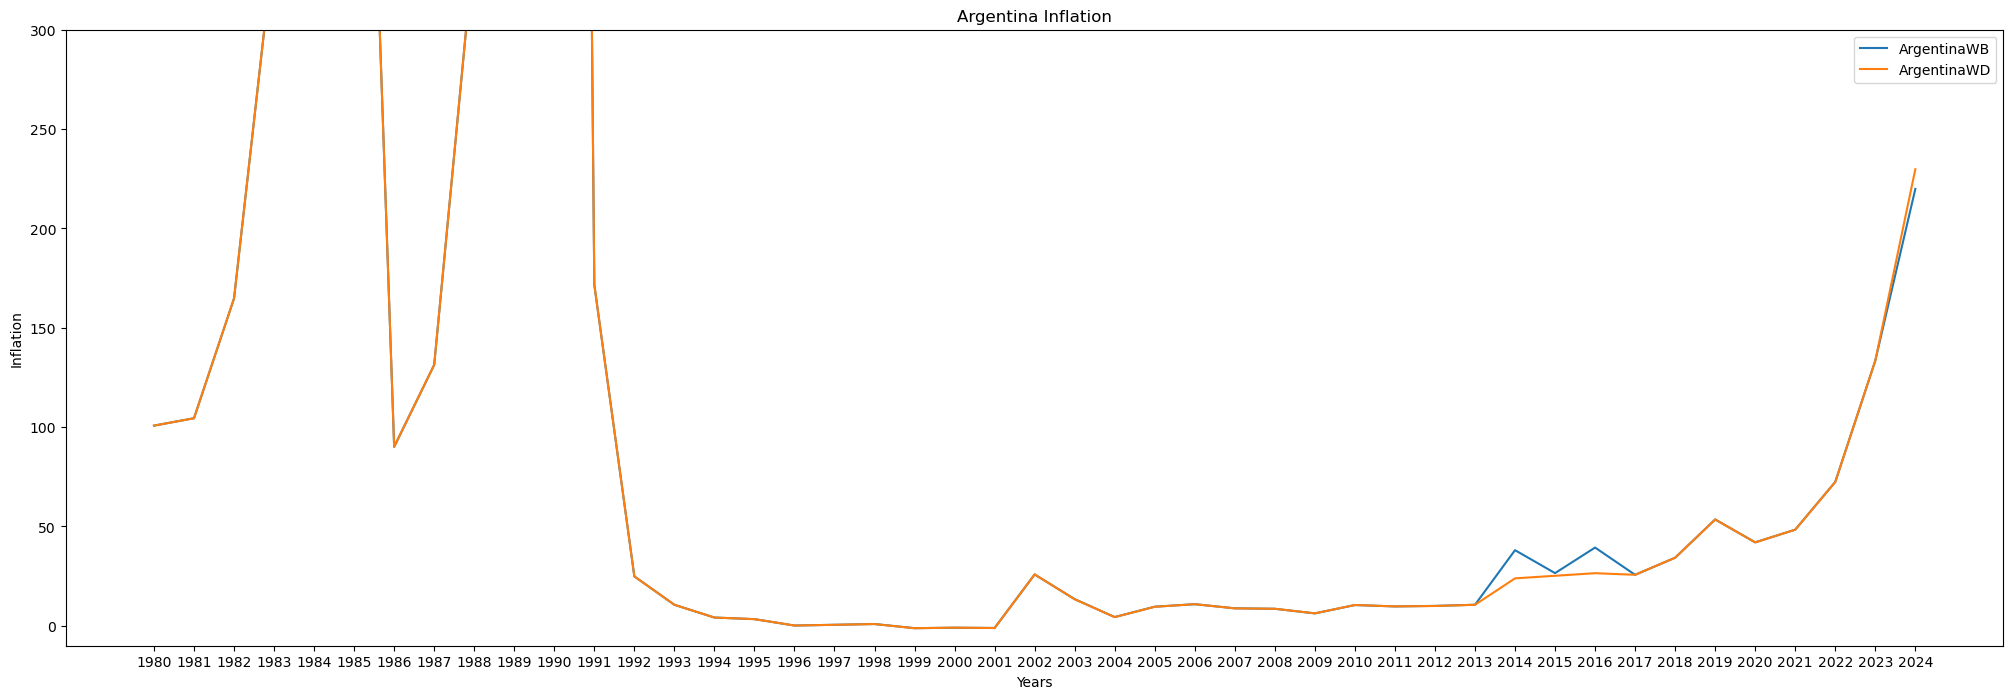

     1982    1983    1984    1985  1986
0  164.78  343.81  626.72  672.18  90.1
1  164.78  343.81  626.72  672.18  90.1 

0    131.33
1    131.33
Name: 1987, dtype: float64 

     1988     1989     1990    1991
0  342.95  3079.81  2313.96  171.67
1  342.96  3079.81  2313.96  171.67


In [225]:
plt.figure(figsize=(25, 8))


# Both rows into one plot
for i in range(len(Argentinas)): 
    plt.plot(
        Argentinas.iloc[:, 2:].columns, 
        Argentinas.iloc[i, 2:].values,
        label=Argentinas.iloc[i, 0]
    )

#plt.plot(Argentinas.iloc[:, 2:].columns, Argentinas.iloc[:, 2:].values[0])
#plt.plot()

plt.xlabel("Years")
plt.ylabel("Inflation")
plt.ylim(bottom=-10, top=300)

plt.title("Argentina Inflation")
plt.legend()

plt.show()

print(Argentinas.loc[:, '1982': '1986'], '\n')
print(Argentinas.loc[:, '1987'], '\n')
print(Argentinas.loc[:, '1988': '1991'])

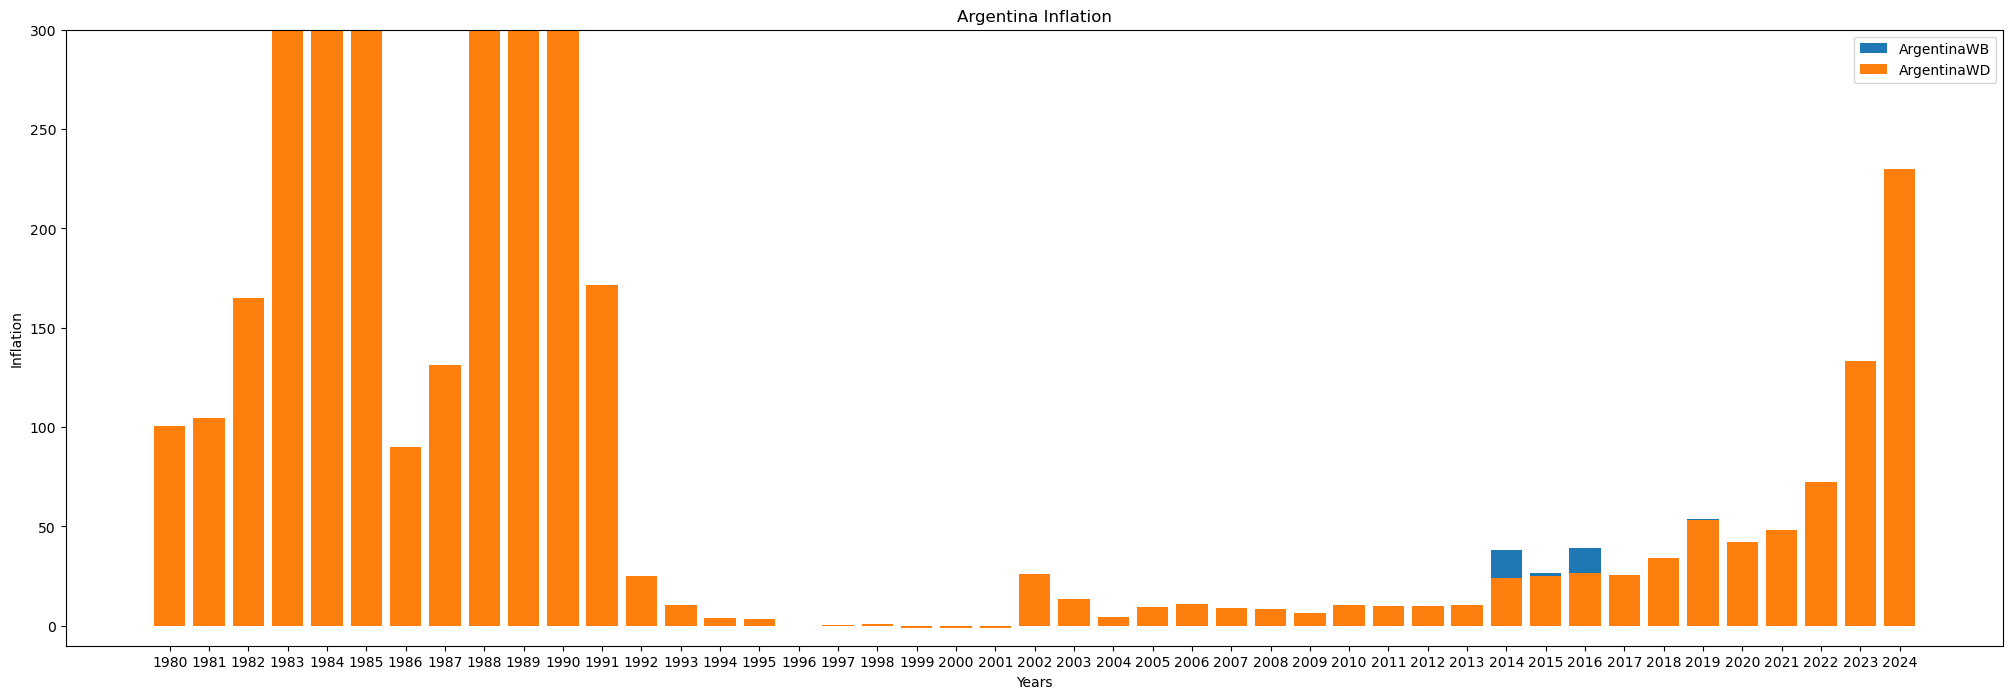

     1982    1983    1984    1985  1986
0  164.78  343.81  626.72  672.18  90.1
1  164.78  343.81  626.72  672.18  90.1 

0    131.33
1    131.33
Name: 1987, dtype: float64 

     1988     1989     1990    1991
0  342.95  3079.81  2313.96  171.67
1  342.96  3079.81  2313.96  171.67


In [226]:
plt.figure(figsize=(25, 8))


# Both rows into one plot
for i in range(len(Argentinas)): 
    plt.bar(
        Argentinas.iloc[:, 2:].columns, 
        Argentinas.iloc[i, 2:].values,
        label=Argentinas.iloc[i, 0]
    )

#plt.plot(Argentinas.iloc[:, 2:].columns, Argentinas.iloc[:, 2:].values[0])
#plt.plot()

plt.xlabel("Years")
plt.ylabel("Inflation")
plt.ylim(bottom=-10, top=300)

plt.title("Argentina Inflation")
plt.legend()

plt.show()

print(Argentinas.loc[:, '1982': '1986'], '\n')
print(Argentinas.loc[:, '1987'], '\n')
print(Argentinas.loc[:, '1988': '1991'])

<font style="color: green; font-size: 35px">Save</font>

In [232]:
Argentinas[Argentinas['Country'] == "ArgentinaWB"].to_csv('Argentina_inflation.csv', index=False)